# Piechart/Table Any Column of "laws and policies" Data

## Function definitions

In [1]:
def expand_col(df,by_col, split_col):
    df = np.array(df)
    unique_by_col = np.unique(df[:,by_col])
    unique_split_col = np.unique(df[:,split_col])
    new_df = []
    headers = []
    headers.append('Country')
    for i in range(len(unique_split_col)):
        headers.append(unique_split_col[i])
    new_df.append(headers)
    for i in range(len(unique_by_col)):                    #i - by unique country
        curr_by_col = unique_by_col[i]
        row = []
        row.append(curr_by_col)
        for j in range(len(unique_split_col)):             #j - by unique column value
            curr_by_split = unique_split_col[j]
            n = 0
            for k in range(len(df)):                            #k - over the whole data
                if(curr_by_col == df[k][by_col] and curr_by_split == df[k][split_col]):
                    n = n + 1
            row.append(n)
        new_df.append(row)
    return new_df

In [2]:
def break_headers(df):
    df = np.array(df)
    headers = df[0,:]
    new_df = []
    for i in range(len(df) - 1):
        new_df.append(df[i + 1])
    return headers, new_df

In [3]:
def mash_line(ls_col):
    line = str(ls_col[0])
    for i in range(len(ls_col) - 1):
        line = line + ";" + str(ls_col[i+1])
    line = line.split(";")
    for i in range(len(line)):
        line[i] = (line[i]).strip()
    line = [string for string in line if string != ""]
    return np.unique(pd.Series(line), return_counts=True)

In [4]:
def print_pie(x,y,title, xlab):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6, 6), dpi=100)
    plt.pie(x, labels=y, autopct='%1.1f%%', labeldistance=1.2)
    plt.title(title)
    plt.xlabel(xlab)
    plt.show()

In [5]:
def country_match(country, ls_country):
    match = False
    for i in range(len(ls_country)):
        if(country.upper() == ls_country[i].upper()):
            match = True
    return match

In [6]:
def read_file(file_string):
    f = open(file_string, "r")
    df = []
    headers = f.readline()
    line = f.readline()
    while line:
        line = line.strip().split(",")
        df.append(line)
        line = f.readline()
    f.close()
    return df

## Main

In [7]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def main():
    col_type = int(input("Select a column...\n'*' indicates an unintuitive selection\n\t1.Title*\n\t2.Type\n\t3.Geography*\n\t4.Geography ISO*\n\t5.Frameworks\n\t6.Responses\n\t7.Instruments\n\t8.Document Types\n\t9.Natural Hazards\n\t10.Keywords\n\t11.Sectors\n\t12.Events*\nYour selection:"))
    if(col_type < 1 or col_type > 12):
        print("ERROR: Not a valid column selection")
        return
    selection = int(input("Do you want to see...\n\t1.A pie chart for an individual country\n\t2.A table for all countries\nYour selection:"))
    if(selection < 1 or selection > 2):
        print("ERROR: Not a valid piechart/table selection")
        return
    
    df = read_file("LAP.csv")
    
    if(selection == 1):
        country = input("Select a country...\nYour selection:")
        
        npdf = np.array(df)
        if(not country_match(country,npdf[:,2])):
            print("ERROR: Not a country")
            return
        
        countrydf = []
        for i in range(len(df)):
            if(df[i][2].upper() == country.upper()):
                countrydf.append(df[i])
        npcountrydf = np.array(countrydf)
        ls, lsn = mash_line(npcountrydf[:,int(col_type-1)])
        ls_header = ['Title', 'Type', 'Geography', 'Geography ISO', 'Frameworks', 'Responses', 'Instruments', 'Document Types','Natural Hazards', 'Keywords', 'Sectors', 'Events']
        print_pie(lsn, ls, str(country) + " " + str(ls_header[col_type - 1]), "n="+str(sum(lsn)))
    elif(selection == 2):
        new_df = expand_col(df,2,int(col_type - 1))
        pddf = pd.DataFrame(data = (break_headers(new_df))[1], columns = (break_headers(new_df))[0])
        display(pddf)

Select a column...
'*' indicates an unintuitive selection
	1.Title*
	2.Type
	3.Geography*
	4.Geography ISO*
	5.Frameworks
	6.Responses
	7.Instruments
	8.Document Types
	9.Natural Hazards
	10.Keywords
	11.Sectors
	12.Events*
Your selection: 6
Do you want to see...
	1.A pie chart for an individual country
	2.A table for all countries
Your selection: 1
Select a country...
Your selection: Colombia


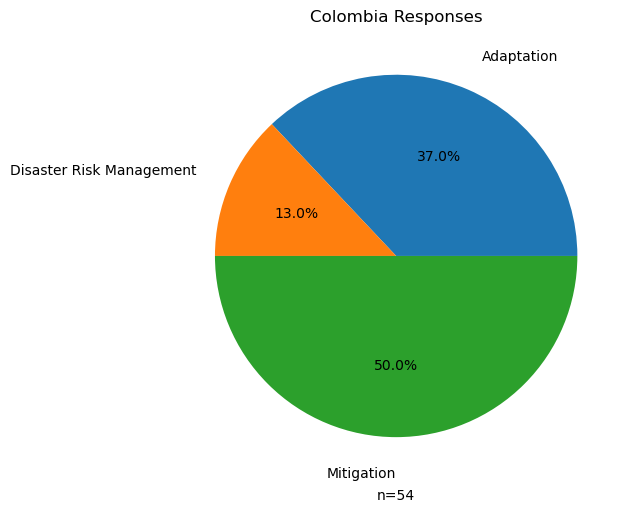

In [13]:
main()

# Merging GDP and p5v2018

## Function definitions

In [14]:
def read_file(file_string):
    f = open(file_string, "r")
    df = []
    headers = f.readline()
    line = f.readline()
    while line:
        line = line.strip().split(",")
        df.append(line)
        line = f.readline()
    f.close()
    return df

## Read-in P5V Data

In [15]:
df_p5v = read_file("P5V.csv")

In [16]:
import pandas as pd
pddf_p5v = pd.DataFrame(df_p5v, columns=['p5', 'cyear', 'ccode', 'scode', 'country', 'year', 'flag', 'fragment', 'democ', 'autoc', 'polity', 'polity2', 'durable', 'xrreg', 'xrcomp', 'xropen', 'xconst', 'parreg', 'parcomp', 'exrec', 'exconst', 'polcomp', 'prior', 'emonth', 'eday', 'eyear', 'eprec', 'interim', 'bmonth', 'bday', 'byear', 'bprec', 'post', 'change', 'd5', 'sf', 'regtrans'])

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pddf_p5v.head(100)

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,polity,polity2,durable,xrreg,xrcomp,xropen,xconst,parreg,parcomp,exrec,exconst,polcomp,prior,emonth,eday,eyear,eprec,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,0,7001800,700,AFG,Afghanistan,1800,0,,1,7,-6,-6,,3,1,1,1,3,3,1,1,6,,,,,,,1,1,1800,1,-6,88,1,,
1,0,7001801,700,AFG,Afghanistan,1801,0,,1,7,-6,-6,,3,1,1,1,3,3,1,1,6,,,,,,,,,,,,,,,
2,0,7001802,700,AFG,Afghanistan,1802,0,,1,7,-6,-6,,3,1,1,1,3,3,1,1,6,,,,,,,,,,,,,,,
3,0,7001803,700,AFG,Afghanistan,1803,0,,1,7,-6,-6,,3,1,1,1,3,3,1,1,6,,,,,,,,,,,,,,,
4,0,7001804,700,AFG,Afghanistan,1804,0,,1,7,-6,-6,,3,1,1,1,3,3,1,1,6,,,,,,,,,,,,,,,
5,0,7001805,700,AFG,Afghanistan,1805,0,,1,7,-6,-6,,3,1,1,1,3,3,1,1,6,,,,,,,,,,,,,,,
6,0,7001806,700,AFG,Afghanistan,1806,0,,1,7,-6,-6,,3,1,1,1,3,3,1,1,6,,,,,,,,,,,,,,,
7,0,7001807,700,AFG,Afghanistan,1807,0,,1,7,-6,-6,,3,1,1,1,3,3,1,1,6,,,,,,,,,,,,,,,
8,0,7001808,700,AFG,Afghanistan,1808,0,,1,7,-6,-6,,3,1,1,1,3,3,1,1,6,,,,,,,,,,,,,,,
9,0,7001809,700,AFG,Afghanistan,1809,0,,1,7,-6,-6,,3,1,1,1,3,3,1,1,6,,,,,,,,,,,,,,,


## Read-in and Reshape GDP data for merging

In [18]:
df_gdp = read_file("GDP.csv")

In [19]:
new_df = []
for i in range(len(df_gdp)):
    for j in range(len(df_gdp[i]) - 4):
        row = []
#         row.append(df_gdp[i][0])    #country
        row.append(str(df_gdp[i][1]))    #country code
        row.append(str(1960+j))          #year
        row.append(str(df_gdp[i][j+4]))  #gdp
        new_df.append(row)

In [20]:
import pandas as pd
pddf_gdp = pd.DataFrame(new_df, columns=['scode', 'year', 'GDPpc'])

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pddf_gdp.head(200)

,scode,year,GDPpc
0,ABW,1960,
1,ABW,1961,
2,ABW,1962,
3,ABW,1963,
4,ABW,1964,
5,ABW,1965,
6,ABW,1966,
7,ABW,1967,
8,ABW,1968,
9,ABW,1969,


## Merging by 'scode' and 'year'

In [22]:
df_merge = pd.merge(pddf_p5v, pddf_gdp, on=['scode', 'year'])
df_merge.head(100)

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,polity,polity2,durable,xrreg,xrcomp,xropen,xconst,parreg,parcomp,exrec,exconst,polcomp,prior,emonth,eday,eyear,eprec,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans,GDPpc
0,0,7001960,700,AFG,Afghanistan,1960,0,,0,10,-10,-10,,3,1,2,1,4,1,2,1,1,,,,,,,,,,,,,,,,
1,0,7001961,700,AFG,Afghanistan,1961,0,,0,10,-10,-10,,3,1,2,1,4,1,2,1,1,,,,,,,,,,,,,,,,
2,0,7001962,700,AFG,Afghanistan,1962,0,,0,10,-10,-10,,3,1,2,1,4,1,2,1,1,,,,,,,,,,,,,,,,
3,0,7001963,700,AFG,Afghanistan,1963,0,,0,10,-10,-10,,3,1,2,1,4,1,2,1,1,,,,,,,,,,,,,,,,
4,0,7001964,700,AFG,Afghanistan,1964,0,,0,7,-7,-7,0,3,1,2,3,4,2,2,3,2,-10,9,9,1964,1,,9,10,1964,1,-7,3,1,,1,
5,0,7001965,700,AFG,Afghanistan,1965,0,,0,7,-7,-7,1,3,1,2,3,4,2,2,3,2,,,,,,,,,,,,,,,,
6,0,7001966,700,AFG,Afghanistan,1966,0,,0,7,-7,-7,2,3,1,2,3,4,2,2,3,2,,,,,,,,,,,,,,,,
7,0,7001967,700,AFG,Afghanistan,1967,0,,0,7,-7,-7,3,3,1,2,3,4,2,2,3,2,,,,,,,,,,,,,,,,
8,0,7001968,700,AFG,Afghanistan,1968,0,,0,7,-7,-7,4,3,1,2,3,4,2,2,3,2,,,,,,,,,,,,,,,,
9,0,7001969,700,AFG,Afghanistan,1969,0,,0,7,-7,-7,5,3,1,2,3,4,2,2,3,2,,,,,,,,,,,,,,,,


## Download as csv

In [61]:
df_merge.to_csv('p5v_gdp.csv', index=False)